In [82]:
# Cell 1 — run once in a notebook cell (or in terminal)
!pip install --quiet pandas scikit-learn matplotlib seaborn joblib nltk


In [83]:
!pip install pandas


In [85]:
import pandas as pd
import re
from sklearn.model_selection import train_test_split


In [92]:
import pandas as pd

csv_path = r'D:\Downloads\enron_spam_data.csv'
df = pd.read_csv(csv_path)

# Check all column names
print("Columns in CSV:", df.columns)


Columns in CSV: Index(['Message ID', 'Subject', 'Message', 'Spam/Ham', 'Date'], dtype='object')


In [95]:
import pandas as pd

csv_path = r'D:\Downloads\enron_spam_data.csv'
df = pd.read_csv(csv_path)

# Step 1: Check the columns
print("Columns in CSV:", df.columns)

# Step 2: Inspect first few rows
print(df.head())


Columns in CSV: Index(['Message ID', 'Subject', 'Message', 'Spam/Ham', 'Date'], dtype='object')
   Message ID                       Subject  \
0           0  christmas tree farm pictures   
1           1      vastar resources , inc .   
2           2  calpine daily gas nomination   
3           3                    re : issue   
4           4     meter 7268 nov allocation   

                                             Message Spam/Ham        Date  
0                                                NaN      ham  1999-12-10  
1  gary , production from the high island larger ...      ham  1999-12-13  
2             - calpine daily gas nomination 1 . doc      ham  1999-12-14  
3  fyi - see note below - already done .\nstella\...      ham  1999-12-14  
4  fyi .\n- - - - - - - - - - - - - - - - - - - -...      ham  1999-12-14  


In [96]:
import pandas as pd
import re
from sklearn.model_selection import train_test_split

# 1️⃣ Load CSV
csv_path = r'D:\Downloads\enron_spam_data.csv'
df = pd.read_csv(csv_path)

# 2️⃣ Inspect data (optional)
print("Columns in CSV:", df.columns)
print("First 5 rows:\n", df.head())

# 3️⃣ Select the correct columns
text_column = 'Message'
label_column = 'Spam/Ham'

# Drop rows with missing text or label
df = df.dropna(subset=[text_column, label_column])

# Convert label to string, lowercase, strip spaces
df[label_column] = df[label_column].astype(str).str.strip().str.lower()

# Map labels to numeric: ham -> 0, spam -> 1
label_mapping = {'ham': 0, 'spam': 1}
df[label_column] = df[label_column].map(label_mapping)

# Drop any rows that could not be mapped
df = df.dropna(subset=[label_column])
df[label_column] = df[label_column].astype(int)

print("Remaining rows:", df.shape[0])
print("Label counts:\n", df[label_column].value_counts())

# 4️⃣ Text preprocessing function
def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'http\S+|www.\S+', '', text)  # remove URLs
    text = re.sub(r'\d+', '', text)               # remove numbers
    text = re.sub(r'[^\w\s]', '', text)          # remove punctuation
    text = re.sub(r'\s+', ' ', text).strip()     # remove extra spaces
    return text

# Apply preprocessing
df['clean_text'] = df[text_column].apply(preprocess_text)

# Drop rows that became empty after cleaning
df = df[df['clean_text'].str.len() > 0]

# 5️⃣ Assign features and target
X = df['clean_text']
y = df[label_column]

# 6️⃣ Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

print("Training samples:", X_train.shape[0])
print("Testing samples:", X_test.shape[0])


Columns in CSV: Index(['Message ID', 'Subject', 'Message', 'Spam/Ham', 'Date'], dtype='object')
First 5 rows:
    Message ID                       Subject  \
0           0  christmas tree farm pictures   
1           1      vastar resources , inc .   
2           2  calpine daily gas nomination   
3           3                    re : issue   
4           4     meter 7268 nov allocation   

                                             Message Spam/Ham        Date  
0                                                NaN      ham  1999-12-10  
1  gary , production from the high island larger ...      ham  1999-12-13  
2             - calpine daily gas nomination 1 . doc      ham  1999-12-14  
3  fyi - see note below - already done .\nstella\...      ham  1999-12-14  
4  fyi .\n- - - - - - - - - - - - - - - - - - - -...      ham  1999-12-14  
Remaining rows: 33345
Label counts:
 Spam/Ham
1    16852
0    16493
Name: count, dtype: int64
Training samples: 26649
Testing samples: 6663


Test Accuracy: 0.9823

Classification Report:
              precision    recall  f1-score   support

         ham       0.99      0.97      0.98      3298
        spam       0.97      0.99      0.98      3365

    accuracy                           0.98      6663
   macro avg       0.98      0.98      0.98      6663
weighted avg       0.98      0.98      0.98      6663



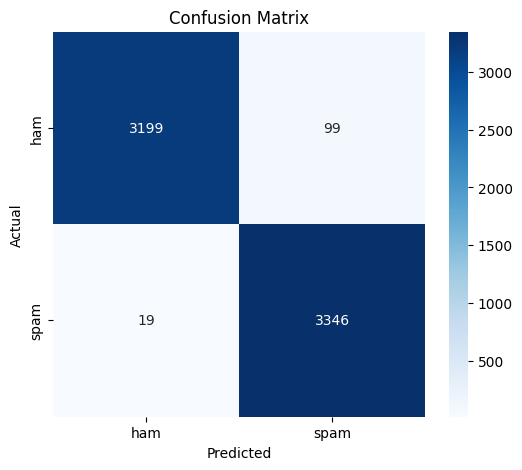

In [97]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# 1️⃣ Create a pipeline
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(stop_words='english', max_features=5000)),
    ('clf', LogisticRegression(max_iter=1000))
])

# 2️⃣ Train the model
pipeline.fit(X_train, y_train)

# 3️⃣ Predict on test set
y_pred = pipeline.predict(X_test)

# 4️⃣ Evaluate
acc = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {acc:.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['ham','spam']))

# 5️⃣ Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['ham','spam'], yticklabels=['ham','spam'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [98]:
import joblib

joblib.dump(pipeline, r'D:\Downloads\spam_classifier_pipeline.pkl')
print("Model saved successfully!")


Model saved successfully!


In [99]:
new_email = ["Congratulations! You won a $1000 gift card. Click here to claim."]
prediction = pipeline.predict(new_email)
print("Spam" if prediction[0] == 1 else "Ham")


Spam
